In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline


In [3]:
cd /Users/austinmcdonald/Desktop/fluo3 corrected ph test

/Users/austinmcdonald/Desktop/fluo3 corrected ph test


In [4]:
os.listdir(path)

NameError: name 'path' is not defined

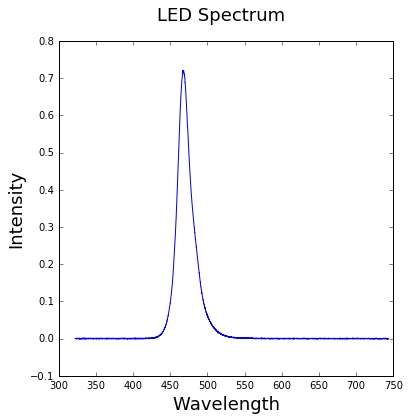

In [5]:
#set path to the files location

path = '/Users/austinmcdonald/Desktop/data/led spec/' # this is the path
Nled=len(os.listdir(path))                            # this is the number of files
filenameled=list(os.listdir(path))                    # this puts the files into a list

# defining empty arrays 
analysisled = []
wavelength = []
intensity = []
# Importing all of the files and saving them to one array
for x in range(1,Nled):
    analysisled.append(np.genfromtxt(path + filenameled[x],delimiter=",",skip_header=33,skip_footer=1))
# This picks out all of the xvals and yvals from the prevous array 
#... note it goes from 0 to x because mac puts an extra file in 
for y in range(0,x):
    wavelength.append(analysisled[y][:,0])
    intensity.append(analysisled[y][:,1])

    
Meanwavelength = np.mean(wavelength,axis = 0)          # Finds the mean of the xvalues

Meanintensity = np.mean(intensity,axis = 0)            # Finds the mean of the yvalues

SDintensity = np.std(intensity,axis = 0)               # Finds the SD of the yvalues
uperr = Meanintensity + SDintensity                    # Adds the SD to the mean 
dnerr = Meanintensity - SDintensity                    # Subtracts the SD from the mean

plt.figure(figsize=(6,6))
plt.plot(Meanwavelength,Meanintensity)
#plt.plot(Meanwavelength,uperr)
#plt.plot(Meanwavelength,dnerr)


plt.suptitle('LED Spectrum',size= 18)
plt.xlabel('Wavelength', fontsize=18)
plt.ylabel('Intensity', fontsize=18)
plt.show()

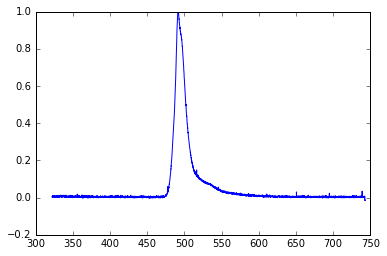

In [6]:
#set path to the files location

#
#
#    noBa
#
#
path = '/Users/austinmcdonald/Desktop/fluo3 corrected ph test/try2/without ba/' # this is the path
Nled=len(os.listdir(path))                            # this is the number of files
filenameled=list(os.listdir(path))                    # this puts the files into a list

# defining empty arrays 
analysisled = []
wavelength = []
intensity = []
# Importing all of the files and saving them to one array
for x in range(1,Nled):
    analysisled.append(pd.read_excel(path + filenameled[x],delimiter=",",header=None,skiprows=1,skip_footer=1))
    
# This picks out all of the xvals and yvals from the prevous array 
#... note it goes from 0 to x because mac puts an extra file in 
for y in range(0,x):
    wavelength.append(analysisled[y][0])
    intensity.append((analysisled[y][1] ))
    
Meanintensity1 = np.mean(intensity,axis = 0)            # Finds the mean of the yvalues

SDintensity = np.std(intensity,axis = 0)               # Finds the SD of the yvalues
uperr1 = Meanintensity1 + SDintensity                    # Adds the SD to the mean 
dnerr1 = Meanintensity1 - SDintensity                    # Subtracts the SD from the mean

#plt.figure(figsize=(6,6))
plt.plot(Meanwavelength,Meanintensity1)
#plt.plot(Meanwavelength,uperr)
#plt.plot(Meanwavelength,dnerr)


#plt.suptitle('LED Spectrum',size= 18)
#plt.xlabel('Wavelength', fontsize=18)
#plt.ylabel('Intensity', fontsize=18)
plt.show()

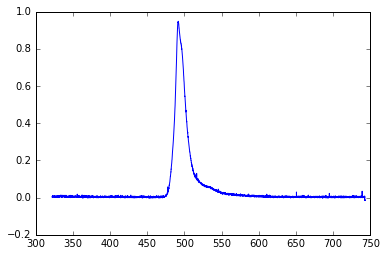

In [7]:
#set path to the files location

#
#
#    sig2-0.4
#
#
path = '/Users/austinmcdonald/Desktop/fluo3 corrected ph test/try2/with ba/' # this is the path
Nled=len(os.listdir(path))                            # this is the number of files
filenameled=list(os.listdir(path))                    # this puts the files into a list

# defining empty arrays 
analysisled = []
wavelength = []
intensity = []
# Importing all of the files and saving them to one array
for x in range(1,Nled):
    analysisled.append(pd.read_excel(path + filenameled[x],delimiter=",",header=None,skiprows=1,skip_footer=1))
    
# This picks out all of the xvals and yvals from the prevous array 
#... note it goes from 0 to x because mac puts an extra file in 
for y in range(0,x):
    wavelength.append(analysisled[y][0])
    intensity.append((analysisled[y][1] ))
    
Meanintensity2 = np.mean(intensity,axis = 0)            # Finds the mean of the yvalues

SDintensity = np.std(intensity,axis = 0)               # Finds the SD of the yvalues
uperr2 = Meanintensity2 + SDintensity                    # Adds the SD to the mean 
dnerr2 = Meanintensity2 - SDintensity                    # Subtracts the SD from the mean

#plt.figure(figsize=(6,6))
plt.plot(Meanwavelength,Meanintensity2)
#plt.plot(Meanwavelength,uperr)
#plt.plot(Meanwavelength,dnerr)


#plt.suptitle('LED Spectrum',size= 18)
#plt.xlabel('Wavelength', fontsize=18)
#plt.ylabel('Intensity', fontsize=18)
plt.show()

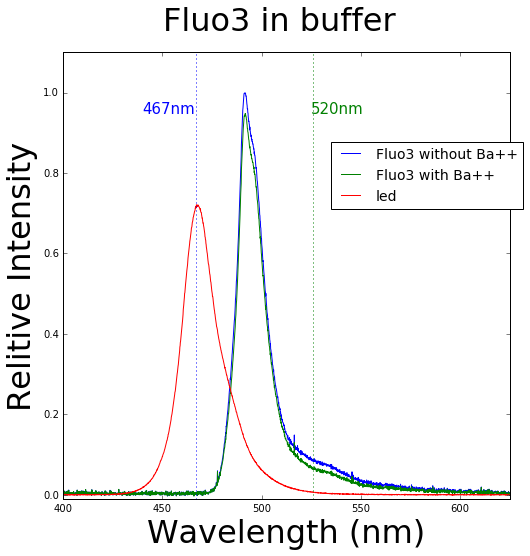

In [25]:
plt.figure(figsize=(8,8))
plt.plot(Meanwavelength,Meanintensity1,label = 'Fluo3 without Ba++')
plt.plot(Meanwavelength,Meanintensity2,label='Fluo3 with Ba++')
plt.plot(Meanwavelength,Meanintensity,label='led')
plt.legend(bbox_to_anchor=(.6, .8), loc=2, borderaxespad=0.,fontsize=14)

plt.axvline(526, color='g', linestyle=':')
plt.text(525,.95,'520nm',rotation=0,fontsize=15,color='g')
plt.axvline(467, color='b', linestyle=':')
plt.text(440,.95,'467nm',rotation=0,fontsize=15,color='b')


plt.suptitle('Fluo3 in buffer',size= 32)
plt.xlabel('Wavelength (nm)', fontsize=32)
plt.ylabel('Relitive Intensity', fontsize=32)
plt.ylim([-.01,1.1])
plt.xlim([400,625])
#plt.savefig('Fluo3 in buffer.pdf')
plt.show()